MovieWriter imagemagick unavailable.


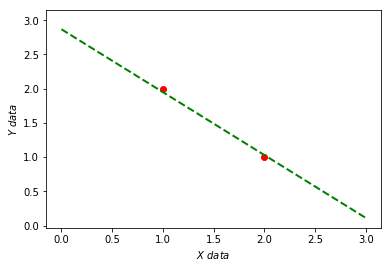

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt 
import matplotlib.animation as animation
import time

# 给定两个点(1,2)和(2,1)，过这两个点拟合一条曲线
points = [(1,2), (2,1)]
learning_rate = 0.1
epochs = 100     # 迭代次数
w = (0, 0)
x = np.linspace(0, 3, 30)

def cal_loss(a, b):
    sum_loss = [(a*x+b-y)**2 for x, y in points]
    return sum(sum_loss)

def gradient_a(a, b):
    return 10*a + 6*b - 8

def gradient_b(a, b):
    return 6*a + 4*b - 6

def update(a, b):
    return (a - learning_rate * gradient_a(a, b), 
            b - learning_rate * gradient_b(a, b))

def update_line(i):
    global w
    try:
        ax.lines.pop(0)
    except Exception:
        pass    
    w = update(w[0], w[1])
    y = w[0]*x + w[1]
    line, = ax.plot(x, y, 'g--', label=r'$Fitting\ line$', lw=2)
    return line

fig, ax = plt.subplots()
train_X = [x for x, _ in points]
train_Y = [y for _, y in points]
l1 = ax.scatter(train_X, train_Y, color='red', label=r'$Original\ data$')
ax.set_xlabel(r'$X\ data$')
ax.set_ylabel(r'$Y\ data$')

ani = animation.FuncAnimation(fig, update_line, frames=100, interval=100)
ani.save('gradient.gif', writer='imagemagick', fps=5)

w = (0, 0)
loss_arr = []
for i in range(epochs):
    w = update(w[0], w[1])
    loss = cal_loss(w[0], w[1])
    loss_arr.append(loss)
    #print("a=%.3f, b=%.3f, loss=%.3f" % (w[0], w[1], loss))
    
#plt.plot(loss_arr) 
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = '../datasets/boston.csv'
df = pd.read_csv(dataset_filename)

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=2)
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

In [5]:
from sklearn.linear_model import SGDRegressor
SGDRegressor?

Init signature:
SGDRegressor(
    loss='squared_loss',
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=None,
    tol=None,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
    n_iter=None,
)
Docstring:     
Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value bec

In [11]:
from sklearn.metrics import mean_squared_error

model = SGDRegressor(max_iter=10000, tol=1e-3)
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[-1.00659345e+11  1.10955416e+11 -3.58546595e+11 -6.36491219e+10
 -1.05300835e+10 -2.24581154e+11 -7.75902052e+11  4.71663369e+10
 -1.16930676e+11 -1.54116010e+11 -3.08755008e+10  3.53724582e+10
 -2.01814848e+11] [-1.62687568e+10]
训练误差： 1.5188314513701105e+28
测试误差： 1.4542705761436552e+28


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
df_norm = (df - df.mean())/df.std()

In [13]:
train_set, test_set = train_test_split(df_norm, test_size=0.4, random_state=2)
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = SGDRegressor(max_iter=10000, tol=1e-3)
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[-0.08950957  0.04377302 -0.05571184  0.09588081 -0.06790644  0.27295238
 -0.01219545 -0.20438561  0.1124306  -0.04162652 -0.23118737  0.12028784
 -0.43517354] [-0.0112482]
训练误差： 0.2586879695856019
测试误差： 0.2972114731058411


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-0.10018918  0.07262549 -0.01366648  0.08020505 -0.14425974  0.23745527
   0.02486108 -0.26565857  0.25055574 -0.15398786 -0.25223914  0.11871505
  -0.46454371]] [-0.01022868]
训练误差： 0.25308272751438626
测试误差： 0.28505642616873056
